In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import plotly.express as px
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#9DD4F3", "#015955", "#97FBF6", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#4B9AC7"]
)
pio.templates.default = "jedha"
pio.renderers.default = "vscode"
from IPython.display import display

In [2]:
# Importing dataset
data = pd.read_csv('conversion_data_train.csv')

data.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


- The column 'new_user' indicates whether the user has already visited the site: 1 - a user is new, i.e. have not visited the site before, 0 - the user is not new (have visited the site before).
- The column 'source' indicates where the user have come from ('seo': from a search engine page, 'ads': by clicking on an ad, 'Direct': direct traffic, ex. the user have typed the website's url directly or used a bookmark).
- The column 'converted' indicates whether the user subscribed to the site's newsletter: 1 - yes, 0 - no.

In [3]:
# Using 'describe' method to have an overview of the dataset
data.describe(include = "all")

print("Shape of the dataframe:", data.shape)

Shape of the dataframe: (284580, 6)


In [4]:
# Checking if there are missing data in the dataset
print("Percentage of missing values: ")
display(100*data.isnull().sum()/data.shape[0])

Percentage of missing values: 


country                0.0
age                    0.0
new_user               0.0
source                 0.0
total_pages_visited    0.0
converted              0.0
dtype: float64

In [5]:
#Checking data types in the dataframe
data.dtypes

country                object
age                     int64
new_user                int64
source                 object
total_pages_visited     int64
converted               int64
dtype: object

In [6]:
# As the dataset is quite big, we will take a sample to make visualisations
data_sample = data.sample(5000)

In [7]:
# How many of the visitors subscribe to the newsletter?
fig = px.pie(data_sample, names ='converted')
fig.show()

In [8]:
# Visualising probability distibution of numeric features
num_features = ['age', 'total_pages_visited']
for f in num_features:
    fig = px.histogram(data_sample, f, color = 'converted', facet_row = 'converted', histnorm = 'probability')
    fig.show()

Visually, we see that the less pages a user has visited, the less likely this user is likely to be converted. And inversely, users visit several pages before they get converted.

<AxesSubplot: >

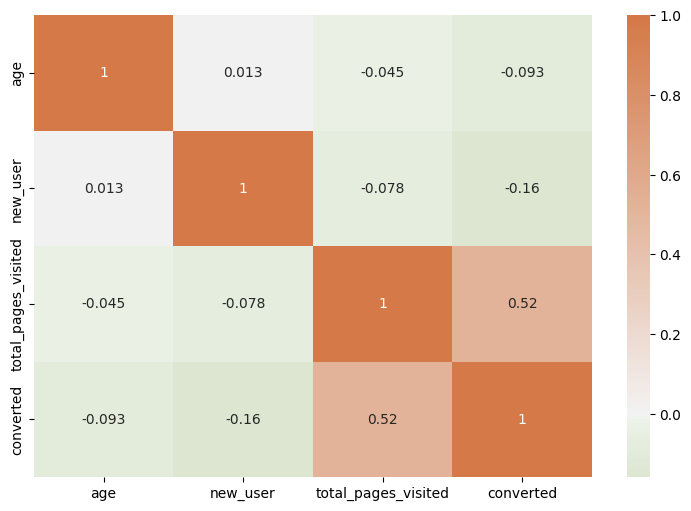

In [9]:
# Creating a heatmap
corr = data_sample.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(9, 6))
palette = sns.diverging_palette(h_neg=110, h_pos=30, l=60, sep=3, as_cmap=True)
sns.heatmap(corr, cmap=palette, center=0.00, annot=True, ax=ax)

Looking at the heatmap, we see that indeed that conversions have a strong positive correlation with the number of pages visites and a smaller negative correlation with the fact that a user is new for the site (i.e. the users that have already visited the site before get converted more easily).